# Fritsch Solition
Author: Joshua D. JOHN
Date: 2024/07/21

This is an implementation of Fritsch Solitons. What I am calling the Fritsch method is a way to create dark solitons at arbitrary position and velocity by simultaneously engineering the amplitude and phase of the condensate wave function. This is introduced as a better approach compared to the technique demonstrated before, which manipulated the condensate phase only.

* Fritsch, A.R., Lu, M., Reid, G., Piñeiro, A., & Spielman, I.B. (2020). _Creating solitons with controllable and near-zero velocity in Bose-Einstein condensates._ Physical review. A, 101 5.


In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory, QuantumMatter
from IPython.display import HTML
from matplotlib import pyplot as plt
from copy import deepcopy
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d


qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│           100 │               100 │                100 │                 36 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [5]:
from FritschSolitonsPkg.FritschSoliton import FritschSolitonMatter

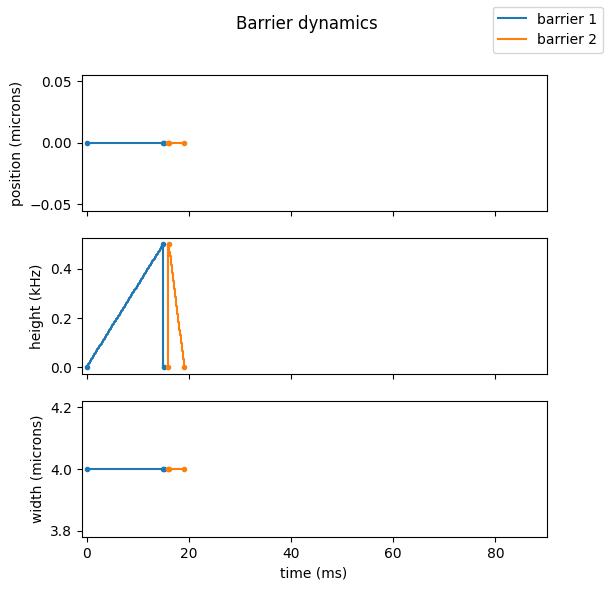

In [6]:
fs = FritschSolitonMatter(qmf, 0.5, 2.0, 10.0)
fs_matter = fs.get_matter()
fs_matter.show_barrier_dynamics()

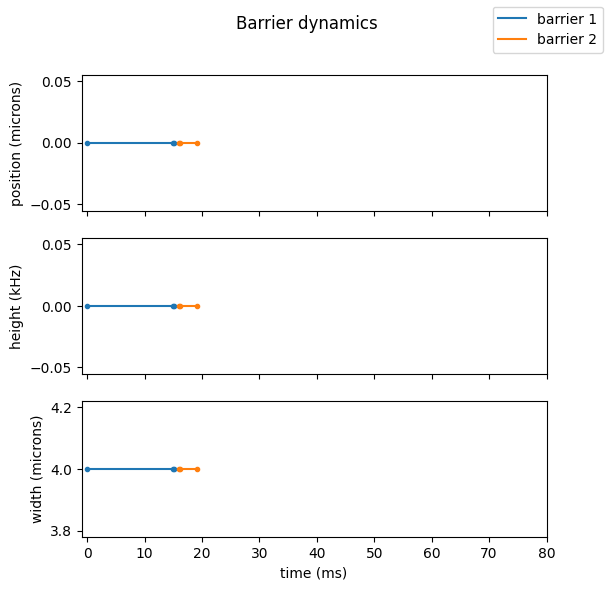

In [7]:
norm_matter = FritschSolitonMatter(qmf, 0.0, 1.0, 0.0).get_matter()
norm_matter.show_barrier_dynamics()

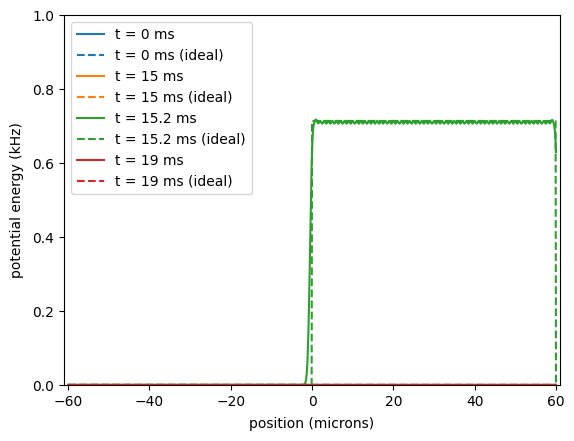

In [8]:
norm_matter.show_potential(times=[0, 15, 15.2, 19],  ylimits=[0, 1], include_magnetic=False, include_ideal=True)

In [ ]:
norm_matter.name